In [1]:
import pandas as pd
import numpy as np

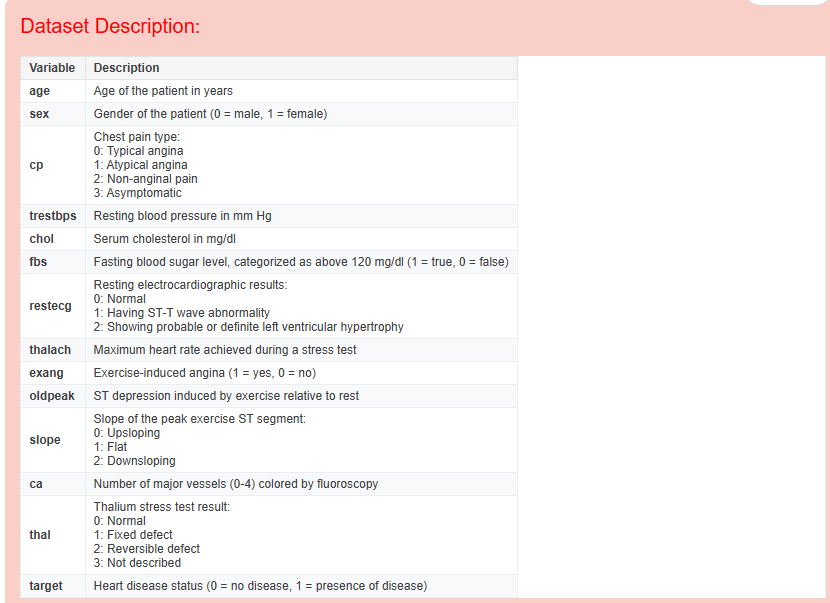

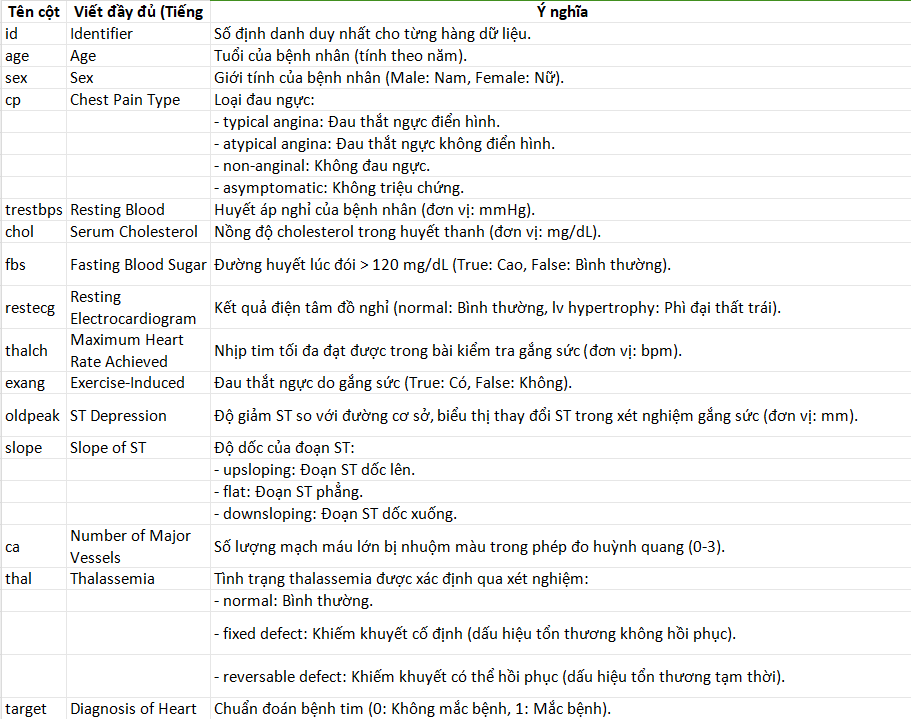

### Mô tả dữ liệu

In [2]:
df_heart = pd.read_csv('heart_disease.csv')
df_heart

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,3,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,1
918,919,58,Male,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df_heart.select_dtypes(include=('int64', 'float64')).head()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
0,1,63,145.0,233.0,150.0,2.3,0.0,0
1,2,67,160.0,286.0,108.0,1.5,3.0,1
2,3,67,120.0,229.0,129.0,2.6,2.0,1
3,4,37,130.0,250.0,187.0,3.5,0.0,0
4,5,41,130.0,204.0,172.0,1.4,0.0,0


In [4]:
df_heart.select_dtypes(include=('object')).head()

,sex,cp,fbs,restecg,exang,slope,thal
0,Male,typical angina,True,lv hypertrophy,False,downsloping,fixed defect
1,Male,asymptomatic,False,lv hypertrophy,True,flat,normal
2,Male,asymptomatic,False,lv hypertrophy,True,flat,reversable defect
3,Male,non-anginal,False,normal,False,downsloping,normal
4,Female,atypical angina,False,lv hypertrophy,False,upsloping,normal


In [5]:
df_heart.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,target
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.553261
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,0.497426
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,1.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,1.000000


In [6]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   cp        920 non-null    object 
 4   trestbps  861 non-null    float64
 5   chol      890 non-null    float64
 6   fbs       830 non-null    object 
 7   restecg   918 non-null    object 
 8   thalch    865 non-null    float64
 9   exang     865 non-null    object 
 10  oldpeak   858 non-null    float64
 11  slope     611 non-null    object 
 12  ca        309 non-null    float64
 13  thal      434 non-null    object 
 14  target    920 non-null    int64  
dtypes: float64(5), int64(3), object(7)
memory usage: 107.9+ KB


### Tách các đặc trưng số và mục lục(Categories)

In [7]:
numeric_col = ['id', 'age',	'trestbps',	'chol',	'thalch',	'oldpeak',	'ca',	'target']
numeric_col


['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']

In [8]:
categories_col = [column for column in df_heart.columns if column not in numeric_col]
categories_col

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

In [9]:
df_numeric = df_heart[numeric_col]
df_numeric = df_numeric.drop(columns='id')
df_numeric

,age,trestbps,chol,thalch,oldpeak,ca,target
0,63,145.0,233.0,150.0,2.3,0.0,0
1,67,160.0,286.0,108.0,1.5,3.0,1
2,67,120.0,229.0,129.0,2.6,2.0,1
3,37,130.0,250.0,187.0,3.5,0.0,0
4,41,130.0,204.0,172.0,1.4,0.0,0
...,...,...,...,...,...,...,...
915,54,127.0,333.0,154.0,0.0,NaN,1
916,62,NaN,139.0,NaN,NaN,NaN,0
917,55,122.0,223.0,100.0,0.0,NaN,1
918,58,NaN,385.0,NaN,NaN,NaN,0


In [10]:
df_heart[df_heart['trestbps'] == 0]

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
753,754,55,Male,non-anginal,0.0,0.0,False,normal,155.0,False,1.5,flat,NaN,NaN,1


### Numeric 

#### Kiểm tra các giá trị bằng 0
- Vì 0 đối với các chỉ số trên là 0 hợp lý điều này gây nhiễu cho bộ data trên, nên cần chuyển về Nan

In [11]:
for col in df_heart[['trestbps', 'chol', 'thalch']]:
    # Đếm số lượng giá trị 0 trước khi thay thế
    zero_count = df_heart[df_heart[col] == 0].shape[0]
    
    # Thay thế giá trị 0 bằng NaN
    df_heart[col] = df_heart[col].replace(0, np.nan)
    
    # In thông tin
    print(f"Column: {col}, Dem_GT_0: {zero_count}")


Column: trestbps, Dem_GT_0: 1
Column: chol, Dem_GT_0: 172
Column: thalch, Dem_GT_0: 0


In [12]:
df_heart.isna().sum()

id            0
age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

#### Numeric columns

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df_heart.isna().sum()

id            0
age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

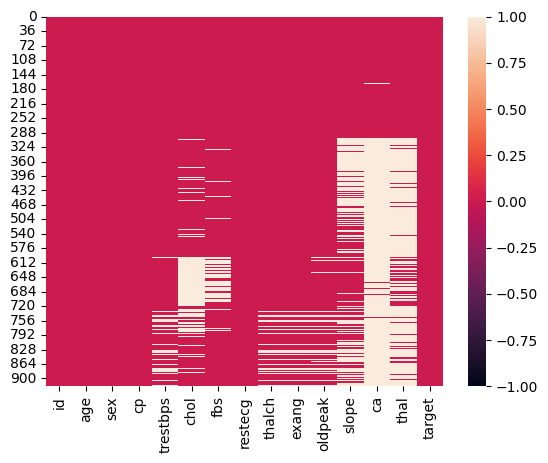

In [15]:
sns.heatmap(df_heart.isna(), vmin=-1, vmax=1);

In [16]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Áp dụng OrdinalEncoder (giữ nguyên giá trị NaN)
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Chỉ encode các cột phân loại
df_heart[categories_col] = ordinal_encoder.fit_transform(df_heart[categories_col])

df_heart.isna().sum()


id            0
age           0
sex           0
cp            0
trestbps     60
chol        202
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
target        0
dtype: int64

In [17]:
corr = df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].corr()
corr

,age,trestbps,chol,thalch,oldpeak,ca,target
age,1.000000,0.253042,0.083326,-0.365778,0.258243,0.370416,0.282700
trestbps,0.253042,1.000000,0.088763,-0.102427,0.171562,0.093705,0.116959
chol,0.083326,0.088763,1.000000,-0.047186,0.046960,0.127798,0.118327
thalch,-0.365778,-0.102427,-0.047186,1.000000,-0.151174,-0.264094,-0.394503
oldpeak,0.258243,0.171562,0.046960,-0.151174,1.000000,0.281817,0.385528
ca,0.370416,0.093705,0.127798,-0.264094,0.281817,1.000000,0.455599
target,0.282700,0.116959,0.118327,-0.394503,0.385528,0.455599,1.000000


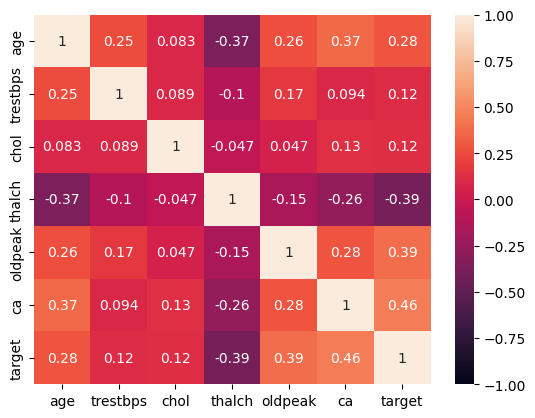

In [18]:
sns.heatmap(data=corr, annot=True,
            vmin=-1, vmax=1);

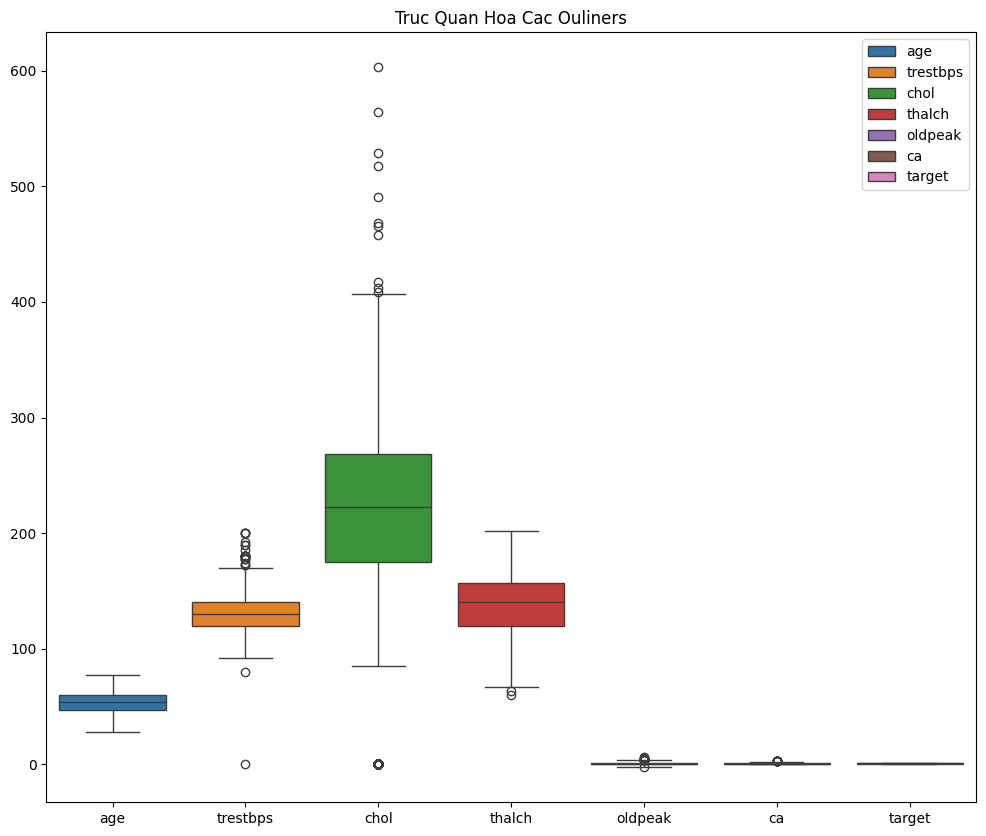

In [19]:
fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(df_numeric, legend=True);
ax.set(title="Truc Quan Hoa Cac Ouliners");
# ax.get_xticklabels('')

In [20]:
df_heart.describe()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
count,920.000000,920.000000,920.000000,920.000000,860.000000,718.000000,830.000000,918.000000,865.000000,865.000000,858.000000,611.000000,309.000000,434.000000,920.000000
mean,460.500000,53.510870,0.789130,0.782609,132.286047,246.832869,0.166265,0.990196,137.545665,0.389595,0.878788,1.229133,0.676375,1.336406,0.553261
std,265.725422,9.424685,0.408148,0.956350,18.536175,58.527062,0.372543,0.632552,25.926276,0.487941,1.091226,0.619256,0.935653,0.660472,0.497426
min,1.000000,28.000000,0.000000,0.000000,80.000000,85.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000,0.000000,0.000000
25%,230.750000,47.000000,1.000000,0.000000,120.000000,210.000000,0.000000,1.000000,120.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,460.500000,54.000000,1.000000,0.000000,130.000000,239.500000,0.000000,1.000000,140.000000,0.000000,0.500000,1.000000,0.000000,1.000000,1.000000
75%,690.250000,60.000000,1.000000,2.000000,140.000000,276.750000,0.000000,1.000000,157.000000,1.000000,1.500000,2.000000,1.000000,2.000000,1.000000
max,920.000000,77.000000,1.000000,3.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [21]:
def detect_outliners_without_nan(x):
    # Bỏ qua giá trị NaN khi tính toán
    q1 = np.nanquantile(x, 0.25)
    q3 = np.nanquantile(x, 0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    return x[(x<lower_bound)|(x>upper_bound)]
print(detect_outliners_without_nan(df_heart['chol']))
# print(detect_outliners_without_nan(df_heart['trestbps']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['thalch']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['oldpeak']).value_counts().sum())
# print(detect_outliners_without_nan(df_heart['ca']).value_counts().sum())

48     417.0
121    407.0
152    564.0
173    394.0
181    409.0
373    412.0
431    100.0
434    468.0
461    394.0
473     85.0
500    466.0
528    529.0
531    392.0
546    603.0
566    404.0
568    518.0
576    388.0
584    491.0
595    393.0
748    100.0
800    458.0
802    384.0
918    385.0
Name: chol, dtype: float64


In [22]:
outliers_dict = {}
for col in df_numeric.columns:
    outliers_dict[col] = detect_outliners_without_nan(df_heart[col]).value_counts().sum()
outliers_dict



{'age': 0,
 'trestbps': 27,
 'chol': 23,
 'thalch': 2,
 'oldpeak': 16,
 'ca': 20,
 'target': 0}

In [23]:
# loại bỏ outliers
for col in df_heart[['chol']]:
    q1 = df_heart[col].quantile(0.25)
    q3 = df_heart[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Lọc dữ liệu trong khoảng hợp lý
    # kết hợp giữ lại điều kiện nan và khoảng tứ phân vị
    df_heart = df_heart[(df_heart[col].isna()) | (df_heart[col] >= lower_bound) & (df_heart[col] <= upper_bound)]

df_heart

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1,63,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,0.0,0
1,2,67,1.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5,1.0,3.0,1.0,1
2,3,67,1.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,4,37,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,1.0,0
4,5,41,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,915,46,1.0,0.0,134.0,310.0,0.0,1.0,126.0,0.0,0.0,NaN,NaN,1.0,1
915,916,54,0.0,0.0,127.0,333.0,1.0,2.0,154.0,0.0,0.0,NaN,NaN,NaN,1
916,917,62,1.0,3.0,NaN,139.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,1.0,0.0,122.0,223.0,1.0,2.0,100.0,0.0,0.0,NaN,NaN,0.0,1


#### Xử lý outliners


In [24]:
# def bound(x):
#     # Bỏ qua giá trị NaN khi tính toán
#     q1 = np.nanquantile(x, 0.25)  # Tính Q1, bỏ qua NaN
#     q3 = np.nanquantile(x, 0.75)  # Tính Q3, bỏ qua NaN
#     IQR = q3 - q1
#     lower_bound = q1 - 1.5 * IQR
#     upper_bound = q3 + 1.5 * IQR
#     return [lower_bound, upper_bound]



In [25]:
df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']].describe()

,age,trestbps,chol,thalch,oldpeak,ca,target
count,897.000000,838.000000,695.000000,843.000000,836.000000,303.000000,897.000000
mean,53.499443,132.140811,241.820144,137.600237,0.876794,0.669967,0.552954
std,9.441446,18.548570,46.661058,26.040127,1.093207,0.929638,0.497465
min,28.000000,80.000000,117.000000,60.000000,-2.600000,0.000000,0.000000
25%,47.000000,120.000000,209.000000,120.000000,0.000000,0.000000,0.000000
50%,54.000000,130.000000,237.000000,140.000000,0.500000,0.000000,1.000000
75%,60.000000,140.000000,274.000000,158.000000,1.500000,1.000000,1.000000
max,77.000000,200.000000,369.000000,202.000000,6.200000,3.000000,1.000000


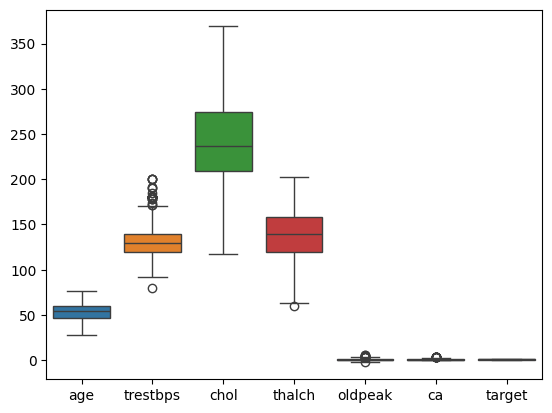

In [26]:
sns.boxplot(data=df_heart[['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'target']]);

In [27]:
df_heart.columns

Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [28]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
# Khởi tạo MICE imputer
imputer = IterativeImputer(max_iter=20, random_state=0)
df_heart = imputer.fit_transform(df_heart)
df_heart = pd.DataFrame(df_heart, columns=['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                                            'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'])
df_heart

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,target
0,1.0,63.0,1.0,3.0,145.000000,233.0,1.0,0.0,150.000000,0.000000,2.300000,0.000000,0.000000,0.000000,0.0
1,2.0,67.0,1.0,0.0,160.000000,286.0,0.0,0.0,108.000000,1.000000,1.500000,1.000000,3.000000,1.000000,1.0
2,3.0,67.0,1.0,0.0,120.000000,229.0,0.0,0.0,129.000000,1.000000,2.600000,1.000000,2.000000,2.000000,1.0
3,4.0,37.0,1.0,2.0,130.000000,250.0,0.0,1.0,187.000000,0.000000,3.500000,0.000000,0.000000,1.000000,0.0
4,5.0,41.0,0.0,1.0,130.000000,204.0,0.0,0.0,172.000000,0.000000,1.400000,2.000000,0.000000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,915.0,46.0,1.0,0.0,134.000000,310.0,0.0,1.0,126.000000,0.000000,0.000000,1.333579,1.043012,1.000000,1.0
893,916.0,54.0,0.0,0.0,127.000000,333.0,1.0,2.0,154.000000,0.000000,0.000000,1.425609,1.407354,1.185558,1.0
894,917.0,62.0,1.0,3.0,133.634582,139.0,0.0,2.0,125.765155,0.046316,0.376487,1.267878,0.653458,1.117915,0.0
895,918.0,55.0,1.0,0.0,122.000000,223.0,1.0,2.0,100.000000,0.000000,0.000000,1.102884,1.387756,0.000000,1.0


In [29]:
df_heart.isna().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

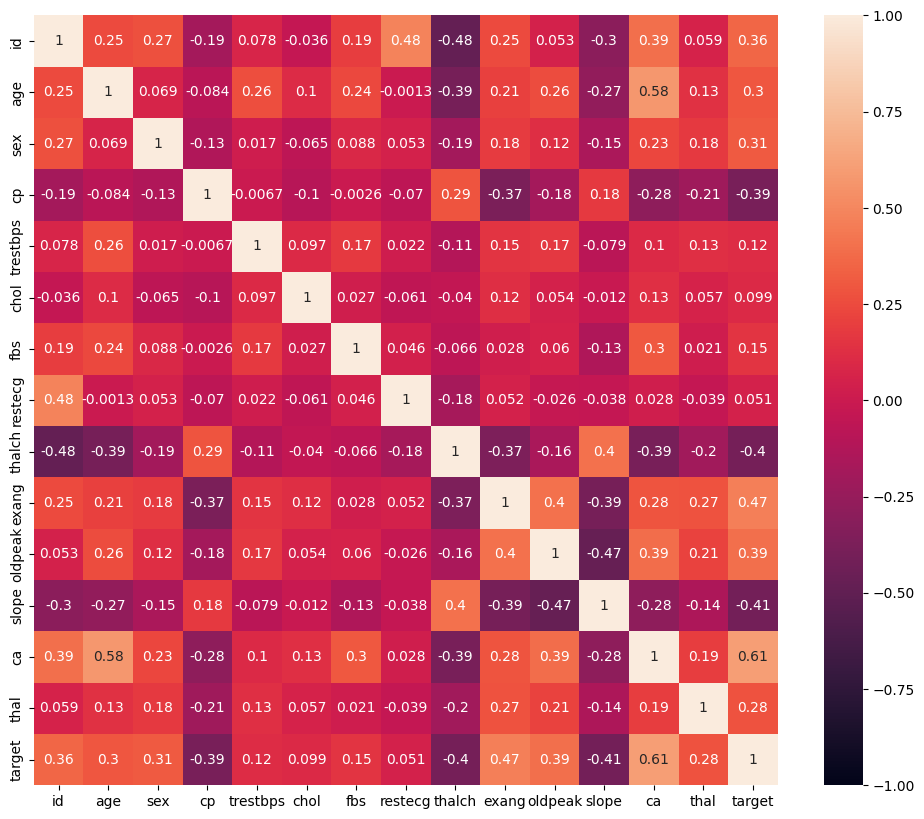

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df_heart.corr(), annot=True, vmin=-1, vmax=1);

## Random Forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
X = df_heart.drop(columns='target', axis=1)
y = df_heart['target']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huan luyen Model
model = RandomForestClassifier()
model.fit(X_train, y_train)


# Du doan tren tap test
pred_y = model.predict(X_test)

acc = accuracy_score(y_test, pred_y)
# Danh gia mo hinh
print(f'Accuracy: {acc:.2f}')

print(f'Classification Report:\n', classification_report(y_test, pred_y))

Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.89        85
         1.0       0.90      0.91      0.90        95

    accuracy                           0.89       180
   macro avg       0.89      0.89      0.89       180
weighted avg       0.89      0.89      0.89       180



In [34]:
for x in range(len(pred_y)):
    print(f'Du doan {pred_y[x]}, Dau vao {X_test.iloc[x]}, Dau ra {y_test.iloc[x]}')

Du doan 0.0, Dau vao id          337.000000
age          39.000000
sex           1.000000
cp            1.000000
trestbps    120.000000
chol        204.000000
fbs           0.000000
restecg       1.000000
thalch      145.000000
exang         0.000000
oldpeak       0.000000
slope         1.618432
ca           -0.041558
thal          1.191468
Name: 331, dtype: float64, Dau ra 0.0
Du doan 1.0, Dau vao id          658.000000
age          56.000000
sex           1.000000
cp            0.000000
trestbps    120.000000
chol        237.098592
fbs           0.000000
restecg       2.000000
thalch      148.000000
exang         0.000000
oldpeak       0.000000
slope         1.000000
ca            1.013623
thal          1.246875
Name: 638, dtype: float64, Dau ra 1.0
Du doan 0.0, Dau vao id          332.000000
age          38.000000
sex           1.000000
cp            1.000000
trestbps    140.000000
chol        297.000000
fbs           0.000000
restecg       1.000000
thalch      150.000000
exang     

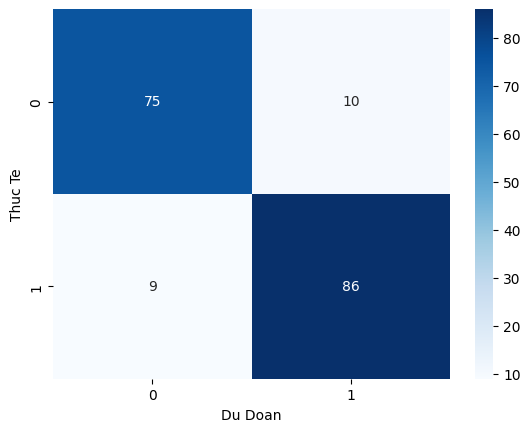

In [35]:
matrix = confusion_matrix(y_test, pred_y)
sns.heatmap(matrix, cmap='Blues', annot=True)
plt.xlabel('Du Doan')
plt.ylabel('Thuc Te');

## Random Forest 2

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Định nghĩa các giá trị tham số cần thử
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,  # 5-fold cross-validation
                           verbose=2, 
                           n_jobs=-1)

# Huấn luyện GridSearchCV trên tập huấn luyện
grid_search.fit(X_train, y_train)

# In tham số tối ưu
print(f"Best Parameters: {grid_search.best_params_}")

# Dự đoán với mô hình tối ưu
best_model = grid_search.best_estimator_
pred_y = best_model.predict(X_test)

# Đánh giá mô hình tối ưu
acc = accuracy_score(y_test, pred_y)
print(f'Optimized Accuracy: {acc:.2f}')
print(f'Classification Report:\n', classification_report(y_test, pred_y))


SyntaxError: invalid syntax (2877264488.py, line 3)

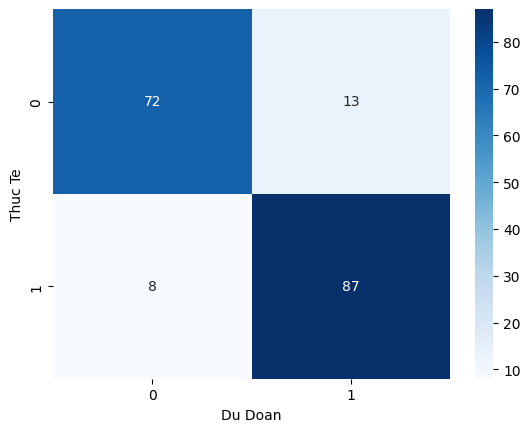

In [86]:
matrix = confusion_matrix(y_test, pred_y)
sns.heatmap(matrix, cmap='Blues', annot=True)
plt.xlabel('Du Doan')
plt.ylabel('Thuc Te');